In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd
import matplotlib.pyplot as plt


In [18]:
stats = pd.read_csv(
    'datasets_30160_38436_2018 FIFA World Cup Squads.csv')

In [19]:
stats

,Team,Group,Squad Number,Position,Player,Date Of Birth,Age,Caps,Goals,Club,Player Count
0,Egypt,A,1,GK,Essam El-Hadary (captain),1973/01/15,45,157,0,Al-Taawoun,1
1,Egypt,A,2,DF,Ali Gabr,1989/01/01,29,20,1,West Bromwich Albion,1
2,Egypt,A,3,DF,Ahmed Elmohamady,1987/09/09,30,77,2,Aston Villa,1
3,Egypt,A,4,MF,Omar Gaber,1992/01/30,26,23,0,Los Angeles FC,1
4,Egypt,A,5,MF,Sam Morsy,1991/09/10,26,4,0,Wigan Athletic,1
...,...,...,...,...,...,...,...,...,...,...,...
731,Senegal,H,19,FW,M'Baye Niang,1994/12/19,23,5,0,Torino,1
732,Senegal,H,20,FW,Keita Baldé,1995/03/08,23,17,3,Monaco,1
733,Senegal,H,21,DF,Lamine Gassama,1989/10/20,28,35,0,Alanyaspor,1
734,Senegal,H,22,DF,Moussa Wagué,1998/10/04,19,9,0,Eupen,1


In [97]:
players_and_goals = stats.sort_values('Goals', ascending=False).head(10)
players_and_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 144 to 615
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           10 non-null     object
 1   Group          10 non-null     object
 2   Squad Number   10 non-null     int64 
 3   Position       10 non-null     object
 4   Player         10 non-null     object
 5   Date Of Birth  10 non-null     object
 6   Age            10 non-null     int64 
 7   Caps           10 non-null     int64 
 8   Goals          10 non-null     int64 
 9   Club           10 non-null     object
 10  Player Count   10 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 960.0+ bytes


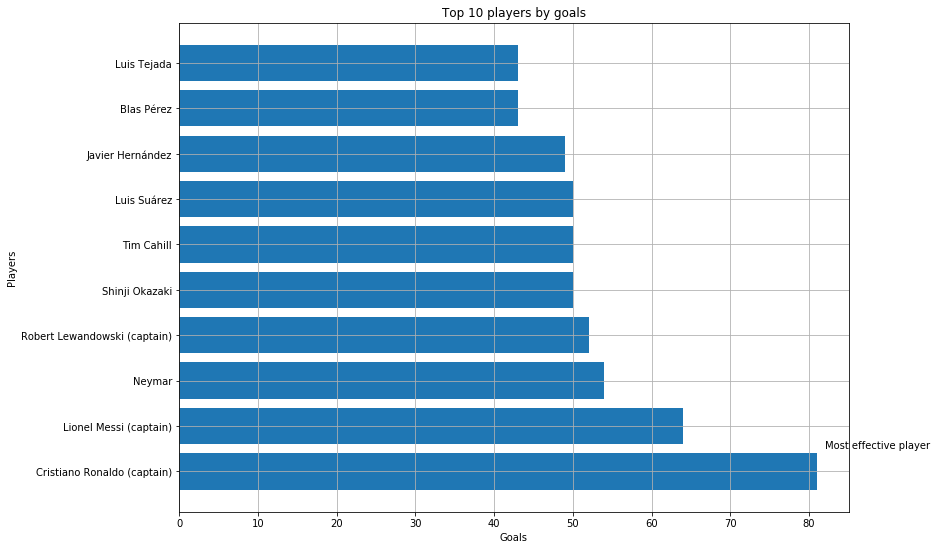

In [98]:
plt.barh(players_and_goals['Player'], players_and_goals['Goals'])
plt.xlabel('Goals')
plt.ylabel('Players')
plt.title('Top 10 players by goals')
plt.text(82, 0.5, 'Most effective player')
plt.grid()
# Цель визуализации показать результативность игроков на чемпионате мира

In [73]:
clubs_players = stats.groupby(['Club']).sum().sort_values('Player Count', ascending=False).head(5)
clubs_players = clubs_players['Player Count']
clubs_players

Club
Manchester City        16
Real Madrid            15
Barcelona              14
Paris Saint-Germain    12
Tottenham Hotspur      12
Name: Player Count, dtype: int64

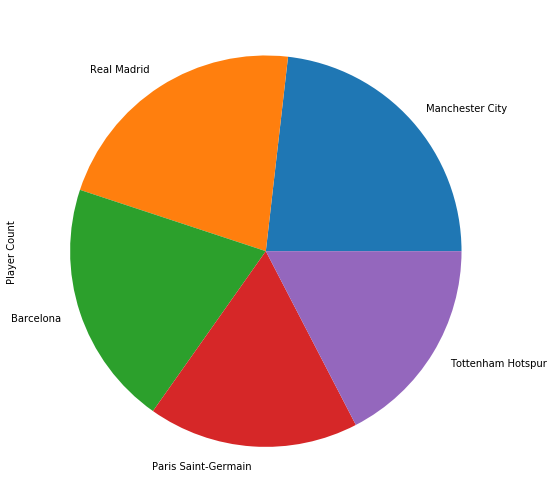

In [70]:
clubs_players.plot(kind='pie', y='Player Count')
# Эта визуализация показывает топ 5 команд по количеству их игроков в составе сборных на ЧМ

In [48]:
teams_and_goals = stats.groupby(['Team']).sum().sort_values('Goals', ascending=False).head(10)

Text(0, 0.5, 'Goals')

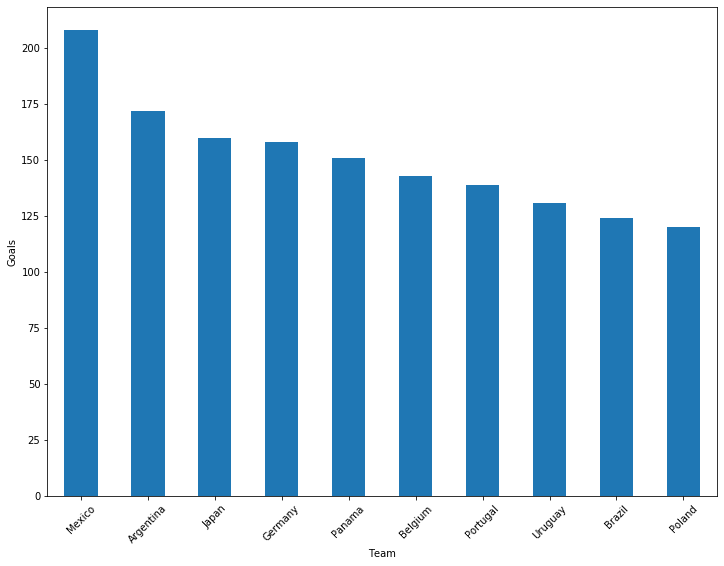

In [56]:
teams_and_goals = teams_and_goals['Goals']
teams_and_goals.plot(kind='bar', rot=45)
plt.ylabel('Goals')
# Эта визуализация показывает, какая страна на ЧМ забила больше всего мячей

In [60]:
teams_and_goals

Team
Mexico       208
Argentina    172
Japan        160
Germany      158
Panama       151
Belgium      143
Portugal     139
Uruguay      131
Brazil       124
Poland       120
Name: Goals, dtype: int64

In [77]:
import seaborn as sns

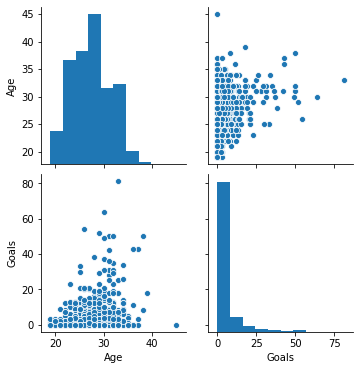

In [99]:
sns_plot = sns.pairplot(
    stats[['Age', 'Goals']])
sns_plot
# Здесь мы видим зависимость количества голов от возраста, можно сделать вывод, что после 30 футболист начинает терять в результативности

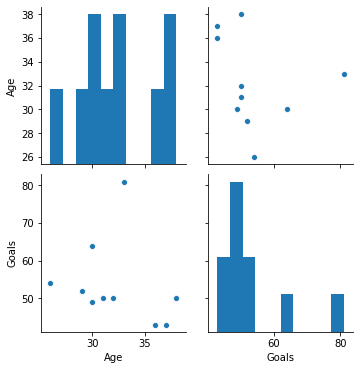

In [101]:
sns_plot = sns.pairplot(
    players_and_goals[['Age', 'Goals']])
sns_plot
# В дополнение к предыдущей зависимости, на этой зависимости видно, что самые результативные игроки тем не менее старше 30

In [172]:
teams_and_age = stats.groupby(['Team', 'Group']).mean().sort_values('Age', ascending=False)[['Age', 'Goals']]
teams = teams_and_age.index

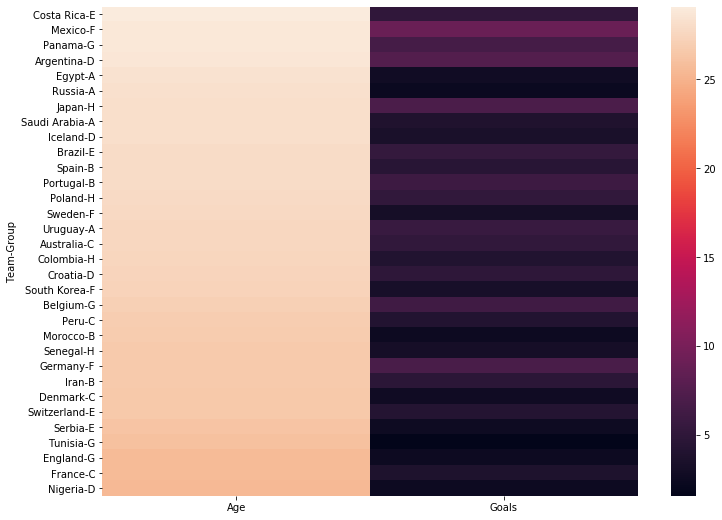

In [178]:
sns.heatmap(teams_and_age)
# На данной визуализации представлен средний возраст и среднее количество голов на игрока для каждой страны, можно сделать вывод, что у чемпиона мира Франции был один из самых молодых составов на турнире